In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
import seaborn as sns

In [ ]:
df = pd.read_csv('placement.csv')

In [56]:
df.head()

,cgpa,iq,experience,internship,gender,placement
0,6.8,123.0,1,9,1,1
1,5.9,106.0,1,5,0,0
2,5.3,121.0,1,10,1,0
3,7.4,132.0,1,8,1,1
4,5.8,142.0,1,8,1,0


In [ ]:
df.shape

(100, 4)

In [ ]:
df= df. iloc[:,1:]

In [ ]:
# Adding 'experience' column (random 0 or 1)
df['experience'] = np.random.choice([0, 1], size=len(df))

# Adding 'internship' column (random 1 to 10)
df['internship'] = np.random.randint(1, 11, size=len(df))

# Adding 'gender' column (Male = 1, Female = 0)
df['gender'] = np.random.choice([1, 0], size=len(df))

# Move 'placement' column to the last position
df = df[['cgpa', 'iq', 'experience', 'internship', 'gender', 'placement']]

# Display first few rows
df.head()

,cgpa,iq,experience,internship,gender,placement
0,6.8,123.0,1,9,1,1
1,5.9,106.0,1,5,0,0
2,5.3,121.0,1,10,1,0
3,7.4,132.0,1,8,1,1
4,5.8,142.0,1,8,1,0


In [ ]:
df.head()

,cgpa,iq,experience,internship,gender,placement
0,6.8,123.0,1,9,1,1
1,5.9,106.0,1,5,0,0
2,5.3,121.0,1,10,1,0
3,7.4,132.0,1,8,1,1
4,5.8,142.0,1,8,1,0


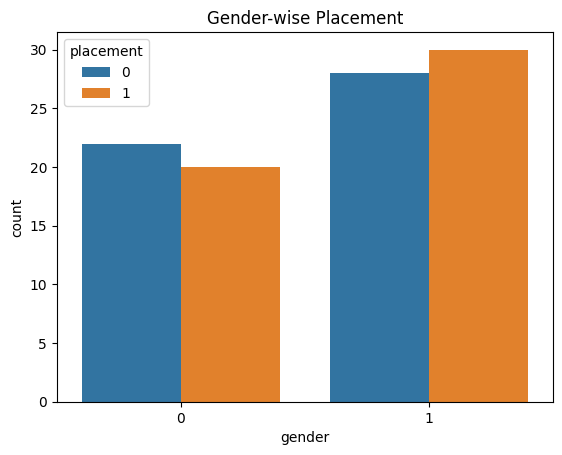

In [17]:
# Gender-wise Placement
sns.countplot(x=df['gender'], hue=df['placement'])
plt.title('Gender-wise Placement')
plt.show()

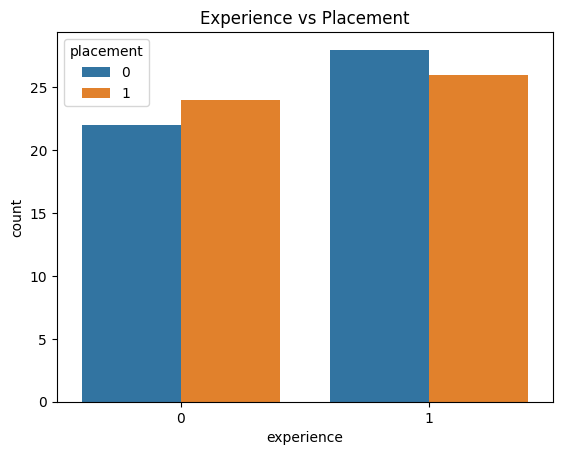

In [18]:
# Experience vs Placement
sns.countplot(x=df['experience'], hue=df['placement'])
plt.title('Experience vs Placement')
plt.show()

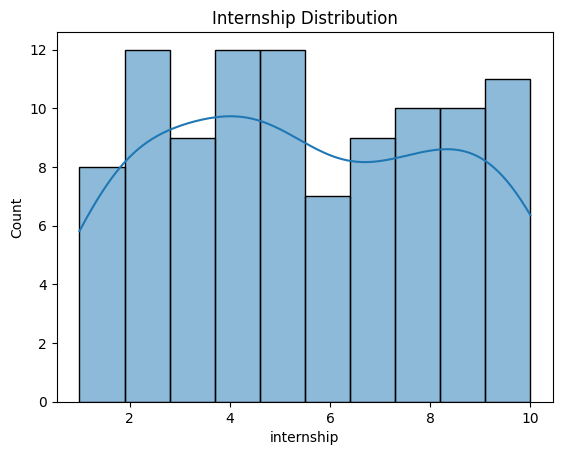

In [19]:
# Internship Distribution
sns.histplot(df['internship'], bins=10, kde=True)
plt.title('Internship Distribution')
plt.show()

In [20]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [21]:
x

,cgpa,iq,experience,internship,gender
0,6.8,123.0,1,9,1
1,5.9,106.0,1,5,0
2,5.3,121.0,1,10,1
3,7.4,132.0,1,8,1
4,5.8,142.0,1,8,1
...,...,...,...,...,...
95,4.3,200.0,0,2,1
96,4.4,42.0,1,9,0
97,6.7,182.0,1,5,0
98,6.3,103.0,0,6,1


In [23]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [24]:
y.shape

(100,)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)


In [26]:
x_train

,cgpa,iq,experience,internship,gender
18,4.0,100.0,0,9,1
30,7.6,128.0,1,7,1
73,4.9,61.0,0,3,1
33,6.0,149.0,1,3,1
90,7.3,86.0,1,4,1
...,...,...,...,...,...
60,6.9,139.0,1,8,1
71,6.1,132.0,1,7,0
14,6.1,103.0,1,3,0
92,5.2,110.0,1,2,1


In [27]:
y_train

,placement
18,0
30,1
73,0
33,0
90,1
...,...
60,1
71,1
14,0
92,0


In [28]:
x_test

,cgpa,iq,experience,internship,gender
83,7.5,130.0,0,6,1
53,8.3,168.0,1,2,1
70,6.3,127.0,0,6,1
45,6.0,66.0,0,8,1
44,7.5,61.0,1,8,1
39,4.6,146.0,1,5,0
22,4.9,120.0,1,2,1
80,4.9,196.0,1,8,1
10,6.0,45.0,0,10,1
0,6.8,123.0,1,9,1


In [29]:
y_test

,placement
83,1
53,1
70,1
45,1
44,1
39,0
22,0
80,0
10,1
0,1


In [34]:
scaler = StandardScaler()

In [33]:
from sklearn.preprocessing import StandardScaler

In [35]:
x_train = scaler.fit_transform(x_train)

In [36]:
x_train

array([[-1.73718527, -0.62029848, -1.06904497,  1.24107127,  0.91473203],
       [ 1.45537303,  0.09806189,  0.93541435,  0.54730472,  0.91473203],
       [-0.9390457 , -1.62087186, -1.06904497, -0.84022837,  0.91473203],
       [ 0.03645823,  0.63683217,  0.93541435, -0.84022837,  0.91473203],
       [ 1.1893265 , -0.97947867,  0.93541435, -0.4933451 ,  0.91473203],
       [-0.14090612,  0.45724208,  0.93541435,  0.89418799,  0.91473203],
       [-0.9390457 ,  0.79076654, -1.06904497, -1.53399492, -1.09321633],
       [ 1.1893265 , -1.90308486, -1.06904497, -1.18711165,  0.91473203],
       [-0.49563482,  0.3802749 , -1.06904497, -1.53399492, -1.09321633],
       [-1.82586745, -0.38939693, -1.06904497,  1.58795454,  0.91473203],
       [ 1.63273738, -0.26111829, -1.06904497,  1.24107127, -1.09321633],
       [-1.38245657,  0.63683217, -1.06904497,  1.58795454, -1.09321633],
       [ 0.92327998,  1.91961855, -1.06904497, -1.53399492,  0.91473203],
       [ 1.45537303, -0.90251149,  0.9

In [37]:
x_test = scaler.transform(x_test)

In [38]:
x_test

array([[ 1.36669085,  0.14937335, -1.06904497,  0.20042145,  0.91473203],
       [ 2.07614825,  1.124291  ,  0.93541435, -1.18711165,  0.91473203],
       [ 0.30250475,  0.07240616, -1.06904497,  0.20042145,  0.91473203],
       [ 0.03645823, -1.49259322, -1.06904497,  0.89418799,  0.91473203],
       [ 1.36669085, -1.62087186,  0.93541435,  0.89418799,  0.91473203],
       [-1.20509222,  0.55986499,  0.93541435, -0.14646183, -1.09321633],
       [-0.9390457 , -0.10718393,  0.93541435, -1.18711165,  0.91473203],
       [-0.9390457 ,  1.84265137,  0.93541435,  0.89418799,  0.91473203],
       [ 0.03645823, -2.0313635 , -1.06904497,  1.58795454,  0.91473203],
       [ 0.74591563, -0.03021675,  0.93541435,  1.24107127,  0.91473203]])

In [39]:
pca = PCA(n_components=2)


In [40]:
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [41]:
x_train_pca

array([[-1.49867693e+00, -1.40410304e+00],
       [-5.89611889e-01,  1.11270334e+00],
       [-1.06968849e+00,  4.85313063e-01],
       [ 5.56050985e-01,  7.92153504e-01],
       [-8.08583298e-01,  1.71412484e+00],
       [-5.39719507e-01, -2.46559324e-01],
       [ 1.86962589e+00, -4.73846901e-01],
       [-1.05570702e+00,  2.19529169e+00],
       [ 1.57394579e+00, -8.77432944e-02],
       [-1.52241738e+00, -1.70119241e+00],
       [-4.06487013e-01, -2.07863416e-02],
       [ 2.00124424e-02, -2.46239259e+00],
       [ 1.94303636e+00,  1.44697862e+00],
       [ 6.10390354e-01,  1.58997280e+00],
       [-8.74508794e-01,  1.42939627e+00],
       [ 1.64401840e+00, -9.47397688e-01],
       [-3.04112873e-01, -1.99902325e+00],
       [-1.85303903e+00, -1.64685396e+00],
       [-2.36611034e+00, -6.68872305e-01],
       [-1.95480898e-01,  1.47961320e+00],
       [ 1.67269232e-01,  1.20640197e+00],
       [ 1.40964056e+00, -8.92660255e-01],
       [ 1.65619307e+00, -2.79302563e-01],
       [-7.

In [42]:
x_test_pca

array([[-0.31353869,  1.14967981],
       [ 1.13461406,  2.28896979],
       [-0.38470668,  0.43303053],
       [-1.92333612,  0.17858636],
       [-2.04670545,  1.20112007],
       [ 0.87987872, -1.2906171 ],
       [ 0.18800499,  0.45882521],
       [ 0.4677744 , -1.06937152],
       [-2.70392212, -0.0957891 ],
       [-1.07816485,  0.26925762]])

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
clf = LogisticRegression()

In [46]:
clf.fit(x_train_pca, y_train)

LogisticRegression()

In [47]:
y_pred = clf.predict(x_test_pca)


In [48]:
y_test

,placement
83,1
53,1
70,1
45,1
44,1
39,0
22,0
80,0
10,1
0,1


In [50]:
from sklearn.metrics import accuracy_score

In [58]:
y_pred = clf.predict(x_test_pca)  # Use x_test_pca instead of x_test
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7


<Axes: >

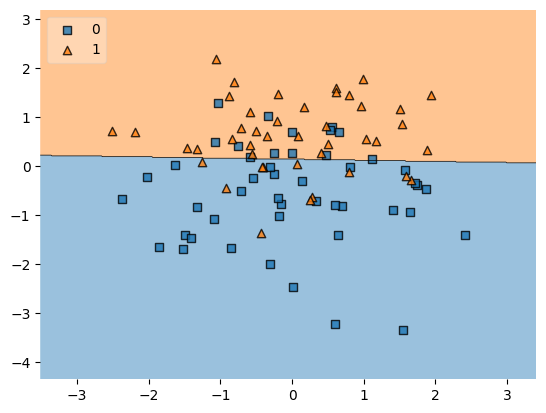

In [59]:
plot_decision_regions(x_train_pca, y_train.values, clf=clf, legend=2)

In [60]:
import pickle

pickle.dump(clf,open('model.pkl','wb'))
